##**Name - Affan**
##**Roll No. - 242210001**
##**Date - 08/04/2025**

# **Binary classification on CIFAR 10 dataset using logistic regression.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import random


# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

bird_plane_train_idx = np.isin(y_train, [2, 0]).flatten()
bird_plane_test_idx = np.isin(y_test, [2, 0]).flatten()

X_train_bin = X_train[bird_plane_train_idx]
y_train_bin = y_train[bird_plane_train_idx]
X_test_bin = X_test[bird_plane_test_idx]
y_test_bin = y_test[bird_plane_test_idx]

y_train_bin = np.where(y_train_bin == 2, 1, 0)
y_test_bin = np.where(y_test_bin == 2, 1, 0)

X_train_bin = X_train_bin.reshape(X_train_bin.shape[0], -1)
X_test_bin = X_test_bin.reshape(X_test_bin.shape[0], -1)

X_train_bin = X_train_bin / 255.0
X_test_bin = X_test_bin / 255.0

scaler = StandardScaler()
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

# Training (using Logistic Regression model)
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_bin, y_train_bin)

y_pred_train = clf.predict(X_train_bin)
y_pred_test = clf.predict(X_test_bin)

train_accuracy = accuracy_score(y_train_bin, y_pred_train)
test_accuracy = accuracy_score(y_test_bin, y_pred_test)

print(f'Training Accuracy: {train_accuracy * 100:.2f}%')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')



Training Accuracy: 88.30%
Test Accuracy: 76.10%


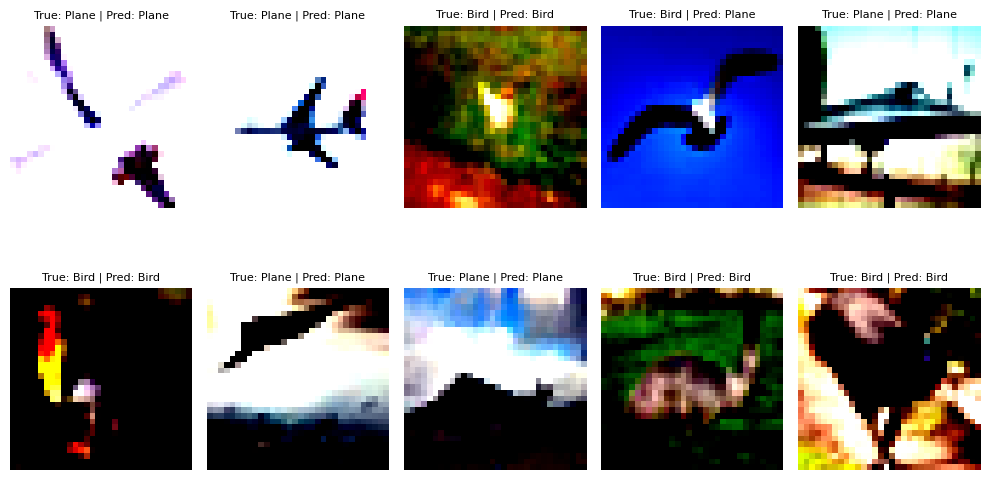

In [ ]:
# Display few predictions.

import random
random_indices = random.sample(range(len(X_test_bin)), 10)
plt.figure(figsize=(10, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    img = X_test_bin[idx].reshape(32, 32, 3)
    plt.imshow(img)

    plt.title(f"True: {['Plane', 'Bird'][y_test_bin[idx].item()]} | Pred: {['Plane', 'Bird'][y_pred_test[idx].item()]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

# **Implementing SVM using PCA for binary classification on CIFAR 10 dataset**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

# Applying PCA dimensionality reduction.
pca = PCA(n_components=50)

X_train_pca = pca.fit_transform(X_train_bin)
X_test_pca = pca.transform(X_test_bin)

svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train_bin)

y_pred_train_svm = svm.predict(X_train_pca)
y_pred_test_svm = svm.predict(X_test_pca)

train_accuracy_svm = accuracy_score(y_train_bin, y_pred_train_svm)
test_accuracy_svm = accuracy_score(y_test_bin, y_pred_test_svm)

print(f'SVM with PCA - Training Accuracy: {train_accuracy_svm * 100:.2f}%')
print(f'SVM with PCA - Test Accuracy: {test_accuracy_svm * 100:.2f}%')



SVM with PCA - Training Accuracy: 79.45%
SVM with PCA - Test Accuracy: 79.50%


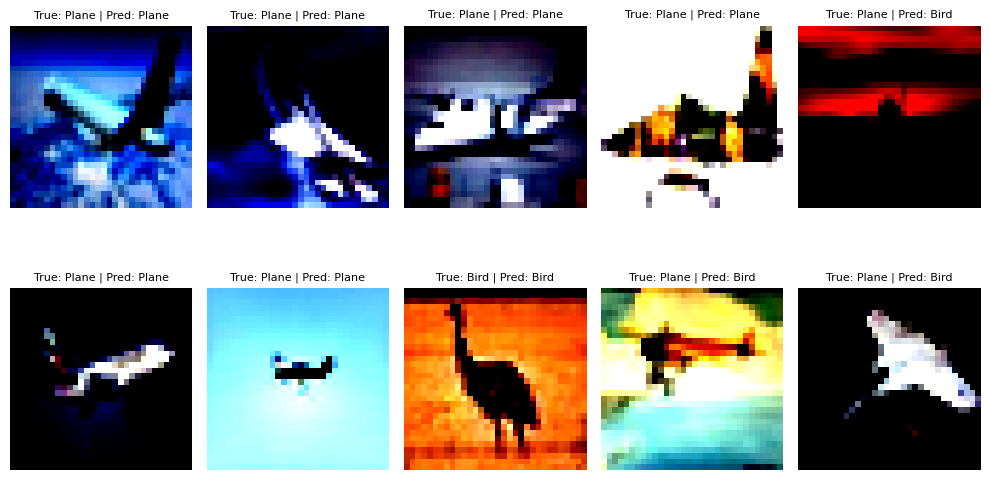

In [ ]:
# Display few predictions.

plt.figure(figsize=(10, 6))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    img = X_test_bin[idx].reshape(32, 32, 3)
    plt.imshow(img)
    plt.title(f"True: {['Plane', 'Bird'][y_test_bin[idx].item()]} | Pred: {['Plane', 'Bird'][y_pred_test_svm[idx]]}", fontsize=8)
    plt.axis('off')

plt.tight_layout()
plt.show()

Logistic Regression

What is Logistic Regression?

Logistic Regression is a supervised machine learning algorithm used for binary classification tasks.
It predicts the probability that a given input belongs to a particular class. The output is in the range of [0, 1], representing the probability of the data point belonging to the positive class (usually labeled as 1).

Unlike linear regression (which predicts continuous values), logistic regression is used when the target variable is categorical (typically binary). For instance, predicting whether an email is spam (1) or not spam (0).

How Does Logistic Regression Work?
Linear Combination:
Logistic regression first computes a linear combination of the input features (like linear regression):

𝑧
=
𝑤
1
𝑥
1
+
𝑤
2
𝑥
2
+
.
.
.
+
𝑤
𝑛
𝑥
𝑛
+
𝑏
z=w
1
​
 x
1
​
 +w
2
​
 x
2
​
 +...+w
n
​
 x
n
​
 +b
where
𝑥
1
,
𝑥
2
,
.
.
.
,
𝑥
𝑛
x
1
​
 ,x
2
​
 ,...,x
n
​
  are the input features,
𝑤
1
,
𝑤
2
,
.
.
.
,
𝑤
𝑛
w
1
​
 ,w
2
​
 ,...,w
n
​
  are the weights, and
𝑏
b is the bias term.

Sigmoid Function:
The linear combination is then passed through the sigmoid function (also known as the logistic function) to produce an output between 0 and 1:

sigmoid
(
𝑧
)
=
1
1
+
𝑒
−
𝑧
sigmoid(z)=
1+e
−z

1
​

The output is interpreted as the probability of the input belonging to class 1 (positive class).

Decision Threshold:
A decision threshold (usually 0.5) is applied to convert the predicted probability into a binary class label:

If
𝑝
≥
0.5
p≥0.5, predict class 1.

If
𝑝
<
0.5
p<0.5, predict class 0.

Cost Function:
To train the logistic regression model, we minimize the logistic loss function (also called binary cross-entropy):

𝐽
(
𝑤
)
=
−
1
𝑚
∑
𝑖
=
1
𝑚
[
𝑦
(
𝑖
)
log
⁡
(
ℎ
(
𝑥
(
𝑖
)
)
)
+
(
1
−
𝑦
(
𝑖
)
)
log
⁡
(
1
−
ℎ
(
𝑥
(
𝑖
)
)
)
]
J(w)=−
m
1
​
  
i=1
∑
m
​
 [y
(i)
 log(h(x
(i)
 ))+(1−y
(i)
 )log(1−h(x
(i)
 ))]
where:

𝑚
m is the number of training examples,

𝑦
(
𝑖
)
y
(i)
  is the actual label of the
𝑖
𝑡
ℎ
i
th
  example,

ℎ
(
𝑥
(
𝑖
)
)
h(x
(i)
 ) is the predicted probability for the
𝑖
𝑡
ℎ
i
th
  example.

Advantages of Logistic Regression:
Simple and interpretable.

Works well for linearly separable data.

Outputs probabilities, which are useful for decision-making.

Disadvantages of Logistic Regression:
Assumes a linear decision boundary, which may not work well for complex datasets.

Sensitive to imbalanced datasets.

Common Use Cases:
Spam detection (spam or not spam).

Medical diagnosis (disease or no disease).

Customer churn prediction.

Support Vector Machine (SVM)
What is SVM?
A Support Vector Machine (SVM) is a supervised machine learning algorithm primarily used for classification (but can also be used for regression).
It is used to find the hyperplane that best separates the data into different classes. The goal is to create the hyperplane with the maximum margin, i.e., the largest possible distance between the hyperplane and the nearest data points from each class.

SVM can handle both linear and non-linear classification problems by using a special trick called the kernel trick.

How Does SVM Work?
Linear SVM (For Linearly Separable Data):
For linearly separable data, SVM tries to find a hyperplane that separates the data points of different classes with the maximum margin.

A hyperplane in 2D is a line.

In 3D, a hyperplane is a plane.

In higher dimensions, a hyperplane is a multi-dimensional boundary.

Margin:
The margin is the distance between the hyperplane and the closest data points from each class. These closest points are called support vectors.

Maximizing the Margin:
The algorithm aims to maximize the margin between the classes. The larger the margin, the better the generalization of the classifier.

Non-linear SVM (Using Kernels):
When data is not linearly separable, SVM can use a kernel function to map the data into a higher-dimensional space where a hyperplane can separate the data.

Common kernel functions include:

Linear Kernel

Polynomial Kernel

Radial Basis Function (RBF) Kernel

Cost Function:
SVM optimizes a convex cost function that balances maximizing the margin and minimizing classification errors:

𝐽
(
𝑤
)
=
1
2
∥
𝑤
∥
2
+
𝐶
∑
𝑖
=
1
𝑚
max
⁡
(
0
,
1
−
𝑦
𝑖
(
𝑤
⋅
𝑥
𝑖
+
𝑏
)
)
J(w)=
2
1
​
 ∥w∥
2
 +C
i=1
∑
m
​
 max(0,1−y
i
​
 (w⋅x
i
​
 +b))
where:

𝑤
w is the weight vector,

𝐶
C is a regularization parameter controlling the trade-off between maximizing the margin and minimizing classification error,

𝑦
𝑖
y
i
​
  is the true label of the
𝑖
𝑡
ℎ
i
th
  data point.

Advantages of SVM:
Works well for both linear and non-linear classification.

Effective in high-dimensional spaces.

Memory efficient because it uses only a subset of training points (support vectors).

Disadvantages of SVM:
Sensitive to the choice of kernel and hyperparameters.

Computationally expensive for large datasets.

Not as interpretable as logistic regression.

Common Use Cases:
Image classification (e.g., handwritten digit recognition).

Text classification (e.g., spam detection).

Bioinformatics (e.g., protein classification).

Comparison: Logistic Regression vs SVM
Linear Decision Boundaries:

Logistic Regression works best when the data is linearly separable.

SVM is more flexible and can handle both linear and non-linear classification (using kernels).

Performance with High-dimensional Data:

Logistic Regression can struggle with high-dimensional datasets, while SVM performs well in such scenarios.

Interpretability:

Logistic regression provides probabilities and is more interpretable, while SVM is harder to interpret due to its margin maximization strategy and the use of kernels.

